Name : SILVA G.B.N.M. <br>
Index No : 190592X

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [5]:
sudoku = cv.imread(r'images/sudoku.png',cv.IMREAD_COLOR)
assert sudoku is not None

gray = cv.cvtColor(sudoku,cv.COLOR_BGR2GRAY)

edges = cv.Canny(gray,50,150,apertureSize=3)
lines = cv.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta  = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0 + 1000*(-b)),int(y0+1000*a)
    x2,y2 = int(x0 - 1000*(-b)),int(y0 - 1000*a)
    cv.line(sudoku,(x1,y1),(x2,y2),(0,0,255),2)

cv.namedWindow("Image",cv.WINDOW_NORMAL)
cv.imshow("Image",gray)
cv.waitKey()
cv.imshow("Image",edges)
cv.waitKey()
cv.imshow("Images",sudoku)
cv.waitKey()
cv.destroyAllWindows()

In [8]:
coins = cv.imread(r'images/coins.jpg',cv.IMREAD_COLOR)
assert coins is not None

gray = cv.cvtColor(coins,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize=3)
lines = cv.HoughLines(edges,1,np.pi/180,200)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,param1=150, param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(coins,(i[0],i[1]),i[2],(0,0,255),3)
    cv.circle(coins,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('DetectedCircles',coins)
cv.waitKey()
cv.destroyAllWindows()

In [19]:
img = cv.imread(r'images/pic1.png' , cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
templ = cv.imread(r'images/templ.png' , cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

img_edges = cv.Canny(img , 50 , 250)
templ_edges = cv.Canny(templ , 50 , 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions , votes = alg.detect(img_edges)

out = cv.cvtColor(img , cv.COLOR_BAYER_BG2BGR)

for x,y,scale,orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x-halfWidth) , int(y-halfHeight))
    p2 = (int(x+halfWidth) , int(y+halfHeight))
    print("x = {} , y = {} , scale = {} , orientation = {} , p1 = {} , p2 = {}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out , p1, p2 , (0 , 0 , 255))


cv.namedWindow("Image" , cv.WINDOW_AUTOSIZE)
cv.imshow("Image" , templ)
cv.waitKey()
cv.imshow("Image" , out)
cv.waitKey()
cv.destroyAllWindows()

x = 29.0 , y = 109.0 , scale = 1.0 , orientation = 0.0 , p1 = (4, 76) , p2 = (54, 141)


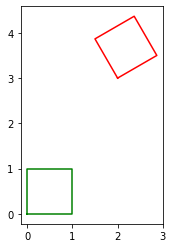

In [18]:
a,b,c,d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx,ty = 2,3
H = np.array([[s*np.cos(theta),-s*np.sin(theta),tx], [s*np.sin(theta),s*np.cos(theta),ty],[0,0,1]])
Y = H@X
x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])

# x = X[0,:]
# y = X[1,:]

fig,ax = plt.subplots(1,1)
ax.plot(x,y,color='g')
ax.set_aspect('equal')

x = np.append(Y[0,:],Y[0,0])
y = np.append(Y[1,:],Y[1,0])
ax.plot(x,y,color='r')
plt.show()